# Electric Vehicle Population

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [177]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Electric Vehicle Population/EV_Population.csv")

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92676 entries, 0 to 92675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    92676 non-null  object 
 1   Model Year               92676 non-null  int64  
 2   Make                     92676 non-null  object 
 3   Electric Vehicle Type    92676 non-null  object 
 4   Electric Range           92676 non-null  int64  
 5   Base MSRP                92676 non-null  int64  
 6   Legislative District     92676 non-null  float64
 7   CAFV Eligibility Simple  92676 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


In [179]:
data.head(3)

State  Model Year   Make Electric Vehicle Type  Electric Range  Base MSRP  \
0    WA        2020  TESLA                   BEV             266          0   
1    WA        2024    BMW                  PHEV              39          0   
2    WA        2024    BMW                  PHEV              39          0   

   Legislative District CAFV Eligibility Simple  
0                  46.0                Eligible  
1                  46.0                Eligible  
2                  43.0                Eligible

In [180]:
data.describe().T

count         mean           std     min     25%  \
Model Year            92676.0  2018.914940      3.277110  1999.0  2017.0   
Electric Range        92676.0   115.509388     98.815377     6.0    30.0   
Base MSRP             92676.0  2018.564461  11390.579691     0.0     0.0   
Legislative District  92676.0    28.506798     14.649595     1.0    17.0   

                         50%     75%       max  
Model Year            2019.0  2021.0    2025.0  
Electric Range          73.0   215.0     337.0  
Base MSRP                0.0     0.0  845000.0  
Legislative District    32.0    41.0      49.0

In [181]:
data.isnull().sum()

State                      0
Model Year                 0
Make                       0
Electric Vehicle Type      0
Electric Range             0
Base MSRP                  0
Legislative District       0
CAFV Eligibility Simple    0
dtype: int64

## Exploratory Analysis And Visualization

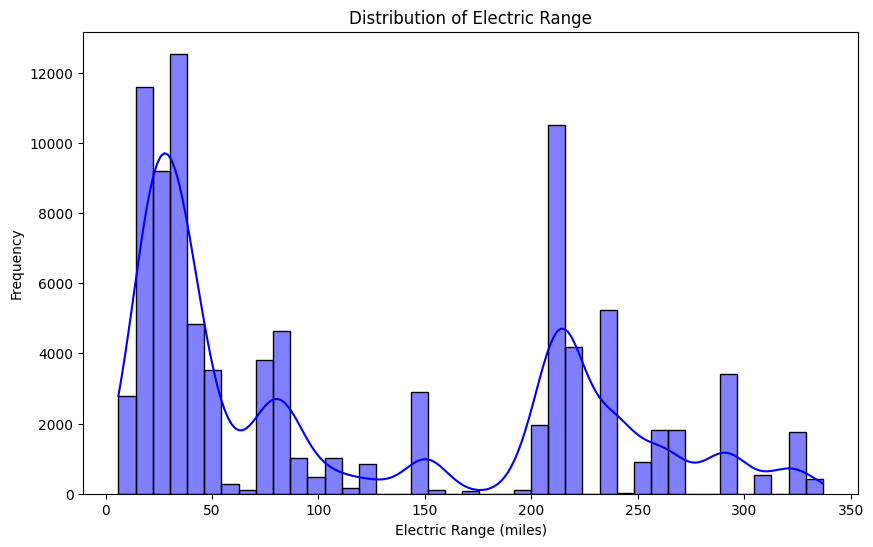

In [183]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

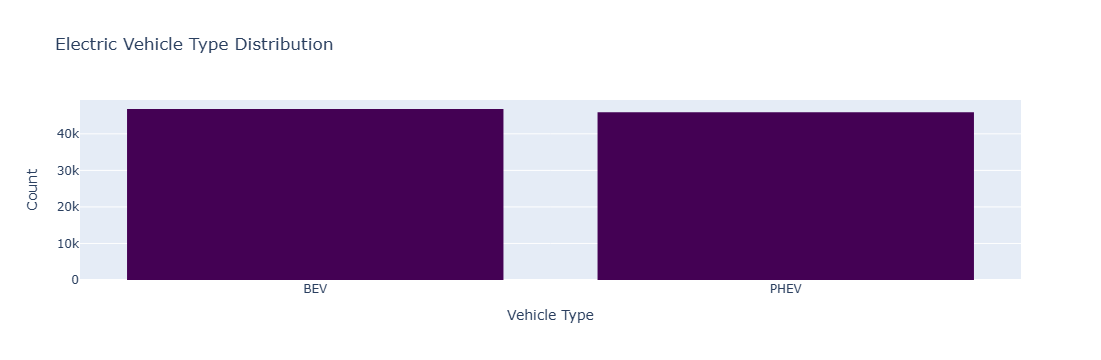

In [184]:
# Create the count plot
fig = px.histogram(
    data,
    x='Electric Vehicle Type',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Electric Vehicle Type Distribution'
)

# Customize the labels
fig.update_layout(
    xaxis_title='Vehicle Type',
    yaxis_title='Count',
    bargap=0.2  # Adjust bar spacing
)

# Show the plot
fig.show()


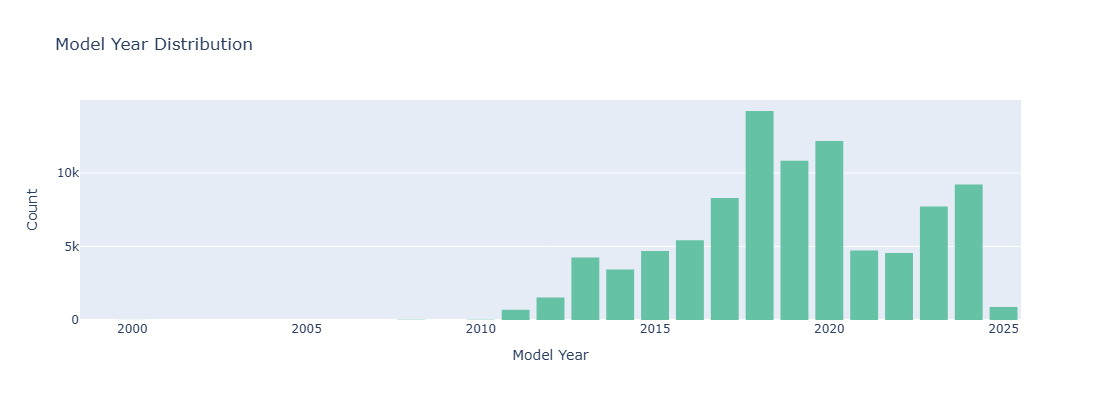

In [185]:

# Create the count plot
fig = px.histogram(
    data,
    x='Model Year',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Model Year Distribution'
)

# Customize the layout and labels
fig.update_layout(
    xaxis_title='Model Year',
    yaxis_title='Count',
    bargap=0.2,  # Adjust bar spacing
    width=1000,  # Adjust figure width
    height=400   # Adjust figure height
)

# Show the plot
fig.show()


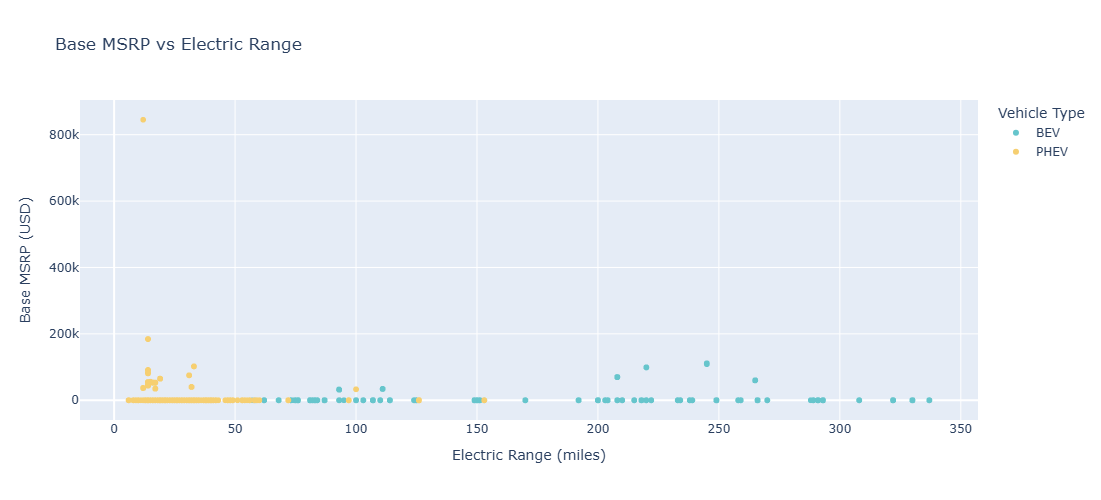

In [186]:
# Create the scatter plot
fig = px.scatter(
    data,
    x='Electric Range',
    y='Base MSRP',
    color='Electric Vehicle Type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Base MSRP vs Electric Range',
    labels={
        'Electric Range': 'Electric Range (miles)',
        'Base MSRP': 'Base MSRP (USD)',
        'Electric Vehicle Type': 'Vehicle Type'
    }
)

# Customize layout
fig.update_layout(
    width=800,  # Adjust figure width
    height=500,  # Adjust figure height
)

# Show the plot
fig.show()


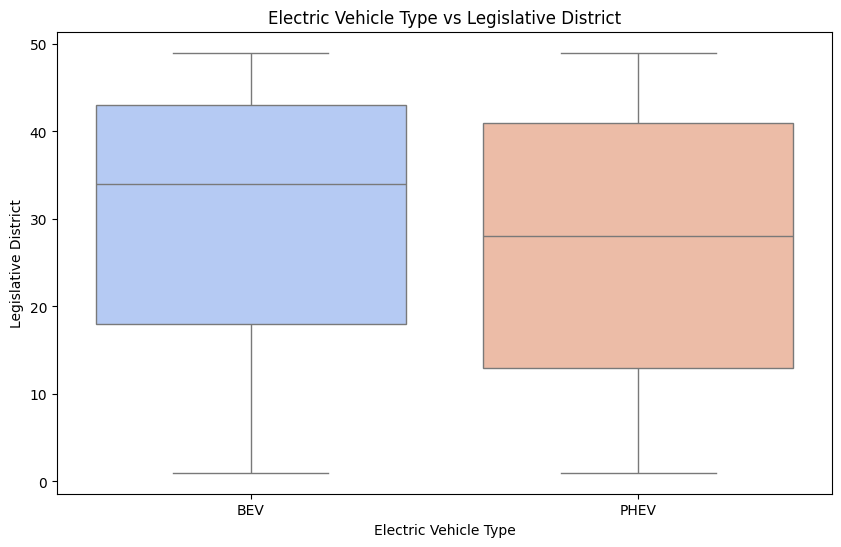

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Legislative District', data=data, palette='coolwarm')
plt.title('Electric Vehicle Type vs Legislative District')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Legislative District')
plt.show()

## Train And Test Modele

In [189]:
X = data[['State', 'Model Year', 'Make', 'Electric Range', 'Base MSRP', 'Legislative District']]
y = data['Electric Vehicle Type']  

X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [191]:
# Encode categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Apply encoding to all categorical columns (assumed here to be object type)
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 99.12602503236944
Classification Report:               precision    recall  f1-score   support

         BEV       0.99      0.99      0.99      9284
        PHEV       0.99      0.99      0.99      9252

    accuracy                           0.99     18536
   macro avg       0.99      0.99      0.99     18536
weighted avg       0.99      0.99      0.99     18536



## Decision Tree Classification

In [193]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)


# Calculate the accuracy score
tree_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 99.76262408286577
Classification Report:               precision    recall  f1-score   support

         BEV       1.00      1.00      1.00      9284
        PHEV       1.00      1.00      1.00      9252

    accuracy                           1.00     18536
   macro avg       1.00      1.00      1.00     18536
weighted avg       1.00      1.00      1.00     18536



## Random Forest Classification

In [195]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Calculate the accuracy score
random_forest_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 100.0
Classification Report:               precision    recall  f1-score   support

         BEV       1.00      1.00      1.00      9284
        PHEV       1.00      1.00      1.00      9252

    accuracy                           1.00     18536
   macro avg       1.00      1.00      1.00     18536
weighted avg       1.00      1.00      1.00     18536



## Navie Bayes

In [197]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Calculate the accuracy score
nb_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 97.64242555028054
Classification Report:               precision    recall  f1-score   support

         BEV       0.96      1.00      0.98      9284
        PHEV       1.00      0.96      0.98      9252

    accuracy                           0.98     18536
   macro avg       0.98      0.98      0.98     18536
weighted avg       0.98      0.98      0.98     18536



## Accuracy Scores 

In [199]:
# Add the model names and accuracy scores to a list
models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [random_forest_accuracy, logreg_accuracy, nb_accuracy, tree_accuracy]

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

# Display the accuracy scores
print(accuracy_df)

                 Model  Accuracy
0        Random Forest  1.000000
1  Logistic Regression  0.991260
2                  SVM  0.976424
3        Decision Tree  0.997626


## Accuracy Scores Visualization

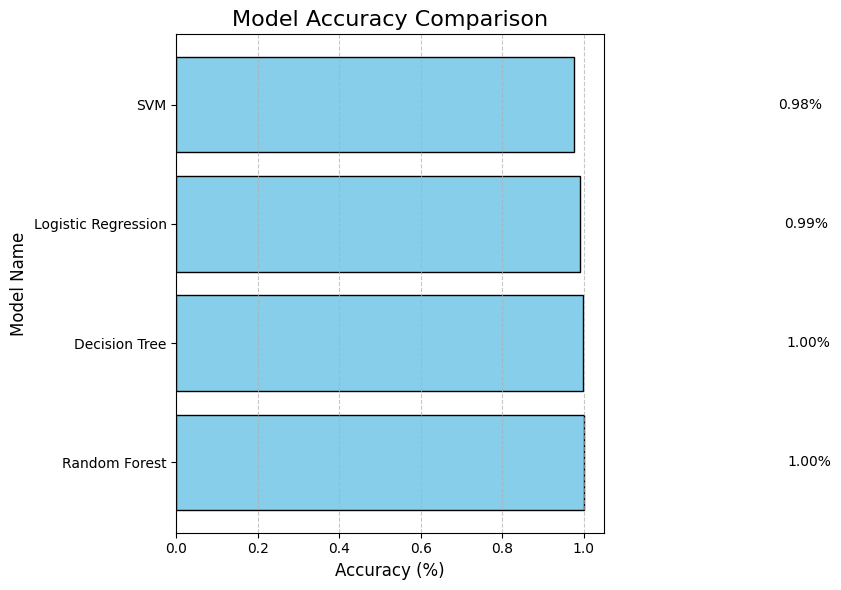

In [201]:
# Sort the data by accuracy for better visualization (optional)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(
    accuracy_df['Model'], 
    accuracy_df['Accuracy'], 
    color='skyblue', 
    edgecolor='black'
)

# Add accuracy values above the bars
for bar in bars:
    plt.text(
        bar.get_width() + 0.5,  # Position slightly beyond the bar
        bar.get_y() + bar.get_height() / 2,  # Centered on the bar
        f'{bar.get_width():.2f}%',  # Accuracy with 2 decimal places
        va='center'
    )

# Customize the chart
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Model Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


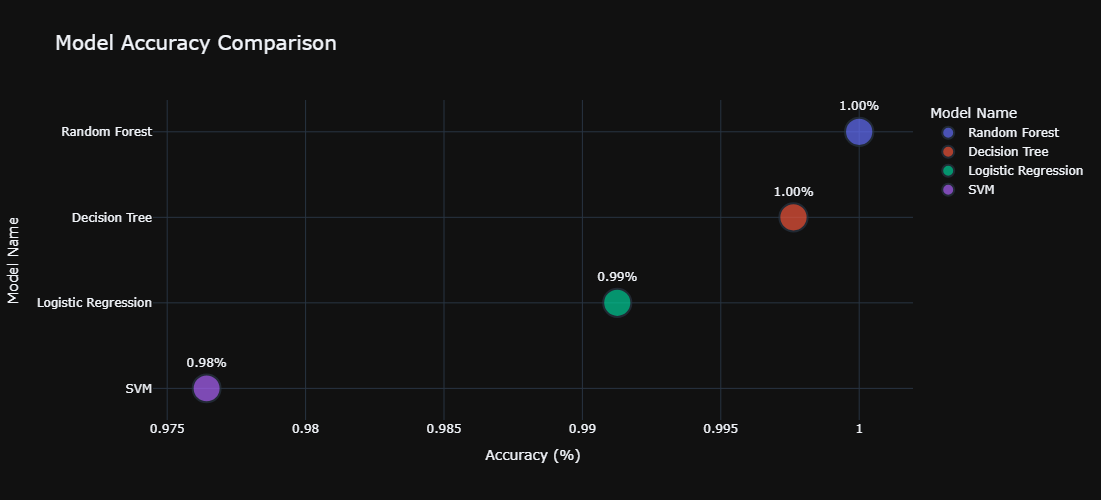

In [202]:
# Create a scatter plot for model accuracies
fig = px.scatter(
    accuracy_df,
    x='Accuracy',  # X-axis: Accuracy
    y='Model',  # Y-axis: Model names
    size='Accuracy',  # Size of the marker proportional to accuracy
    color='Model',  # Color by model for differentiation
    text='Accuracy',
    title='Model Accuracy Comparison',
    labels={'Accuracy': 'Accuracy (%)', 'Model': 'Model Name'}
)

# Update layout for better readability
fig.update_traces(
    marker=dict(line_width=2),  # Thicker marker outlines
    texttemplate='%{text:.2f}%',  # Show accuracy with two decimal points
    textposition='top center'  # Center text above markers
)

# Customize layout for visual clarity
fig.update_layout(
    title_font_size=20,
    xaxis_title='Accuracy (%)',
    yaxis_title='Model Name',
    template='plotly_dark',  # Optional: Use a dark theme
    height=500  # Adjust chart height for better viewing
)

# Show the plot
fig.show()
